## Error Analysis for Hypertension Tag Predictions (BERT Augmented)

In [1]:
import os
import string
import random
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

In [2]:
# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [3]:
import numpy as np

### Test LABELS for TOKENS in TEST Dataset against BERT Outputs

BERT Classifier has returned results for the tokens passed in 'test.tsv' file.  The returned values are probabilities, that need to be converted into equivalent class labels based on majority class.  Then, the class label should be compared against the actual label from the code above to extract the IO-Coding from the xml files.  This is a brute-force approach or a manual way of verifying the validity of the predictions


Read in results from BERT Predicitons to the above dataset
The above dataset is derived from IO-Coding applied as done on the training set. This is what should be based on the annotation process. Nowe, we have to read in the predictions from bert, which is a set of class probabilities across all 3 classes and we have to merget that with the above dataset for comparison and error analysis.

### Data File Names

* Test files with Labels and Filenames : /data_for_bert_sent/test_files_with_labels/*_testfile.csv
* Bert label mapping /data_for_bert_sent/test_files_with_labels/*_labelmapping.csv
* BERT evaluation /data_for_bert_sent/BERT_run_results/*_eval_results.txt


In [4]:
print(os.path.dirname(os.path.abspath('__file__')))

C:\Users\Kalyan\Documents\Anu\W266 - NLP\Final Project\lheart-disease-risk-prediction\Code


### Hypertension Indicator

In [5]:
# read in the test files with labels

HI_test = pd.read_csv("data_for_bert_augmented/test_files_with_labels/hypertension_ind_testfile.csv")

In [6]:
HI_test.rename( columns={'Unnamed: 0' :'sentenceId'}, inplace=True )

In [7]:
HI_test.head(10)

,sentenceId,sentence,label,file
0,0,Record date: 2069-04-07,Other,110-01.xml
1,1,Mr. Villegas is seen today.,Other,110-01.xml
2,2,I have not seen him since November.,Other,110-01.xml
3,3,About three weeks ago he stopped his Prednison...,Other,110-01.xml
4,4,he was gaining weight.,Other,110-01.xml
5,5,He does feel that his shoulders are,Other,110-01.xml
6,6,definitely improved.,Other,110-01.xml
7,7,"It is unclear what he is actually taking, but",Other,110-01.xml
8,8,I think based on the color of his pills and th...,Other,110-01.xml
9,9,medication that he continues taking his Atenol...,mention,110-01.xml


In [8]:
# read in the test results captured for BERT Hypertension model and specify columns as the actual file has no header
bert_aug_HI_results = pd.read_csv("data_for_bert_augmented/bert_augmented_run_results/bert_aug_data_output_data_hypertension_ind_output_results_test_results.tsv", sep='\t',header=None)
 
bert_aug_HI_results.columns=["Class0", "Class1", "Class2"]

In [9]:
bert_aug_HI_results.head()

,Class0,Class1,Class2
0,0.999976,0.000009,0.000015
1,0.999976,0.000010,0.000013
2,0.999977,0.000009,0.000014
3,0.999976,0.000010,0.000015
4,0.999976,0.000009,0.000015


In [10]:
bert_aug_HI_results['predClass'] = bert_aug_HI_results.idxmax(axis=1)

In [11]:
bert_aug_HI_results.head()

,Class0,Class1,Class2,predClass
0,0.999976,0.000009,0.000015,Class0
1,0.999976,0.000010,0.000013,Class0
2,0.999977,0.000009,0.000014,Class0
3,0.999976,0.000010,0.000015,Class0
4,0.999976,0.000009,0.000015,Class0


In [12]:
bert_aug_HI_results['predClass'].value_counts()

Class0    36631
Class2      757
Class1      250
Name: predClass, dtype: int64

In [13]:
def HI_set_labels(classlabel):
    if (classlabel=='Class1'):
        return 'high bp'
    elif (classlabel=='Class2'):
        return 'mention'
    else:
        return 'Other'

In [14]:
bert_aug_HI_results['predLabel'] = bert_aug_HI_results['predClass'].apply(HI_set_labels)

bert_aug_HI_results.head(10)


,Class0,Class1,Class2,predClass,predLabel
0,0.999976,0.000009,0.000015,Class0,Other
1,0.999976,0.000010,0.000013,Class0,Other
2,0.999977,0.000009,0.000014,Class0,Other
3,0.999976,0.000010,0.000015,Class0,Other
4,0.999976,0.000009,0.000015,Class0,Other
5,0.999978,0.000009,0.000013,Class0,Other
6,0.999972,0.000010,0.000018,Class0,Other
7,0.999976,0.000010,0.000013,Class0,Other
8,0.999976,0.000009,0.000015,Class0,Other
9,0.008876,0.000566,0.990558,Class2,mention


In [15]:
# validating the counts by label
bert_aug_HI_results['predLabel'].value_counts()

Other      36631
mention      757
high bp      250
Name: predLabel, dtype: int64

In [16]:
HI_combined = pd.concat([HI_test, bert_aug_HI_results], axis=1)

In [17]:
HI_combined.head()

,sentenceId,sentence,label,file,Class0,Class1,Class2,predClass,predLabel
0,0,Record date: 2069-04-07,Other,110-01.xml,0.999976,0.000009,0.000015,Class0,Other
1,1,Mr. Villegas is seen today.,Other,110-01.xml,0.999976,0.000010,0.000013,Class0,Other
2,2,I have not seen him since November.,Other,110-01.xml,0.999977,0.000009,0.000014,Class0,Other
3,3,About three weeks ago he stopped his Prednison...,Other,110-01.xml,0.999976,0.000010,0.000015,Class0,Other
4,4,he was gaining weight.,Other,110-01.xml,0.999976,0.000009,0.000015,Class0,Other


In [18]:
HI_combined[HI_combined['predLabel']!='Other']

,sentenceId,sentence,label,file,Class0,Class1,Class2,predClass,predLabel
9,9,medication that he continues taking his Atenol...,mention,110-01.xml,0.008876,0.000566,0.990558,Class2,mention
67,67,Blood pressure 142/74.,high bp,110-02.xml,0.001026,0.998671,0.000303,Class1,high bp
75,75,(3) Hypertension.,mention,110-02.xml,0.010002,0.000472,0.989526,Class2,mention
105,105,HTN,mention,110-03.xml,0.004241,0.000357,0.995402,Class2,mention
119,119,Exam: \t,Other,110-03.xml,0.015537,0.979063,0.005401,Class1,high bp
120,120,VS: T: 98.1 HR: 59 BP: 158/72 RR: 20 Sat: ...,high bp,110-03.xml,0.000466,0.999245,0.000289,Class1,high bp
190,190,HYPERTENSION,mention,110-04.xml,0.011772,0.000509,0.987719,Class2,mention
273,273,"dependent diabetes mellitus, hypertension.",mention,111-01.xml,0.009509,0.000485,0.990007,Class2,mention
310,310,patient is a 58-year-old male with a history o...,mention,111-02.xml,0.008856,0.000477,0.990667,Class2,mention
327,327,"179/85, a pulse of 91, respirations of 20, and...",high bp,111-02.xml,0.001270,0.998459,0.000271,Class1,high bp


In [19]:
HI_test_labels = HI_combined['label']
HI_pred_labels = HI_combined['predLabel']

#print(type(HI_test_labels))

In [20]:
accuracy_score(HI_test_labels, HI_pred_labels)

0.994872203623997

In [21]:
print(classification_report(HI_pred_labels, HI_test_labels))

              precision    recall  f1-score   support

       Other       1.00      1.00      1.00     36631
     high bp       0.87      0.75      0.80       250
     mention       0.95      0.90      0.93       757

   micro avg       0.99      0.99      0.99     37638
   macro avg       0.94      0.88      0.91     37638
weighted avg       0.99      0.99      0.99     37638



In [22]:
unique_label = np.unique(HI_test_labels)
print(pd.DataFrame(confusion_matrix(HI_test_labels, HI_pred_labels, labels=unique_label), 
                   index=['true:{:}'.format(x) for x in unique_label], 
                   columns=['pred:{:}'.format(x) for x in unique_label]))

              pred:Other  pred:high bp  pred:mention
true:Other         36573            59            69
true:high bp          26           187             3
true:mention          32             4           685


Confusion matrix, without normalization
[[36573    59    69]
 [   26   187     3]
 [   32     4   685]]


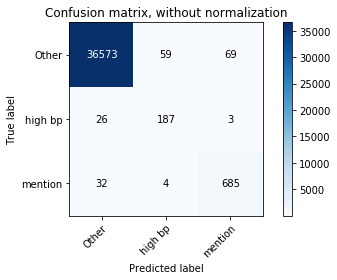

In [23]:
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

    fig.tight_layout()
    return ax

plot_confusion_matrix(HI_test_labels, HI_pred_labels, ["Other", "high bp", "mention"])
plt.show()

### Hypertension Time

In [27]:
# read in the test files with labels

HT_test = pd.read_csv("data_for_bert_sent/test_files_with_labels/hypertension_time_testfile.csv")

In [28]:
HT_test.rename( columns={'Unnamed: 0' :'sentenceId'}, inplace=True )

In [29]:
HT_test.head(10)

,sentenceId,sentence,label,file
0,0,Record date: 2069-04-07,Other,110-01.xml
1,1,Mr. Villegas is seen today.,Other,110-01.xml
2,2,I have not seen him since November.,Other,110-01.xml
3,3,About three weeks ago he stopped his Prednison...,Other,110-01.xml
4,4,he was gaining weight.,Other,110-01.xml
5,5,He does feel that his shoulders are,Other,110-01.xml
6,6,definitely improved.,Other,110-01.xml
7,7,"It is unclear what he is actually taking, but",Other,110-01.xml
8,8,I think based on the color of his pills and th...,Other,110-01.xml
9,9,medication that he continues taking his Atenol...,before DCT,110-01.xml


In [31]:
# read in the test results captured for BERT Augmented Hypertension model and specify columns as the actual file has no header
bert_aug_HT_results = pd.read_csv("data_for_bert_augmented/bert_augmented_run_results/bert_aug_data_output_data_hypertension_time_output_results_test_results.tsv", sep='\t',header=None)
 
bert_aug_HT_results.columns=["Class0", "Class1", "Class2", "Class3"]

In [32]:
bert_aug_HT_results.head()

,Class0,Class1,Class2,Class3
0,0.999970,0.00001,0.000011,0.000009
1,0.999969,0.00001,0.000012,0.000009
2,0.999971,0.00001,0.000011,0.000009
3,0.999970,0.00001,0.000010,0.000010
4,0.999969,0.00001,0.000012,0.000009


In [34]:
bert_aug_HT_results['predClass'] = bert_aug_HT_results.idxmax(axis=1)

In [35]:
bert_aug_HT_results.head()

,Class0,Class1,Class2,Class3,predClass
0,0.999970,0.00001,0.000011,0.000009,Class0
1,0.999969,0.00001,0.000012,0.000009,Class0
2,0.999971,0.00001,0.000011,0.000009,Class0
3,0.999970,0.00001,0.000010,0.000010,Class0
4,0.999969,0.00001,0.000012,0.000009,Class0


In [36]:
bert_aug_HT_results['predClass'].value_counts()

Class0    36630
Class3      433
Class1      362
Class2      213
Name: predClass, dtype: int64

In [37]:
def HT_set_labels(classlabel):
    if (classlabel=='Class1'):
        return 'after DCT'
    elif (classlabel=='Class2'):
        return 'before DCT'
    elif (classlabel=='Class3'):
        return 'during DCT'
    else:
        return 'Other'

In [38]:
bert_aug_HT_results['predLabel'] = bert_aug_HT_results['predClass'].apply(HT_set_labels)

bert_aug_HT_results.head(10)


,Class0,Class1,Class2,Class3,predClass,predLabel
0,0.999970,0.000010,0.000011,0.000009,Class0,Other
1,0.999969,0.000010,0.000012,0.000009,Class0,Other
2,0.999971,0.000010,0.000011,0.000009,Class0,Other
3,0.999970,0.000010,0.000010,0.000010,Class0,Other
4,0.999969,0.000010,0.000012,0.000009,Class0,Other
5,0.999969,0.000011,0.000012,0.000009,Class0,Other
6,0.999967,0.000010,0.000013,0.000010,Class0,Other
7,0.999967,0.000011,0.000014,0.000009,Class0,Other
8,0.999970,0.000010,0.000011,0.000010,Class0,Other
9,0.008506,0.002817,0.000919,0.987758,Class3,during DCT


In [39]:
# validating the counts by label
bert_aug_HT_results['predLabel'].value_counts()

Other         36630
during DCT      433
after DCT       362
before DCT      213
Name: predLabel, dtype: int64

In [40]:
HT_combined = pd.concat([HT_test, bert_aug_HT_results], axis=1)

In [41]:
HT_combined.head()

,sentenceId,sentence,label,file,Class0,Class1,Class2,Class3,predClass,predLabel
0,0,Record date: 2069-04-07,Other,110-01.xml,0.999970,0.00001,0.000011,0.000009,Class0,Other
1,1,Mr. Villegas is seen today.,Other,110-01.xml,0.999969,0.00001,0.000012,0.000009,Class0,Other
2,2,I have not seen him since November.,Other,110-01.xml,0.999971,0.00001,0.000011,0.000009,Class0,Other
3,3,About three weeks ago he stopped his Prednison...,Other,110-01.xml,0.999970,0.00001,0.000010,0.000010,Class0,Other
4,4,he was gaining weight.,Other,110-01.xml,0.999969,0.00001,0.000012,0.000009,Class0,Other


In [42]:
HT_combined[HT_combined['predLabel']!='Other']

,sentenceId,sentence,label,file,Class0,Class1,Class2,Class3,predClass,predLabel
9,9,medication that he continues taking his Atenol...,before DCT,110-01.xml,0.008506,0.002817,0.000919,0.987758,Class3,during DCT
67,67,Blood pressure 142/74.,during DCT,110-02.xml,0.002532,0.001270,0.001051,0.995147,Class3,during DCT
75,75,(3) Hypertension.,during DCT,110-02.xml,0.024731,0.955402,0.000802,0.019064,Class1,after DCT
105,105,HTN,before DCT,110-03.xml,0.001760,0.992364,0.002421,0.003455,Class1,after DCT
120,120,VS: T: 98.1 HR: 59 BP: 158/72 RR: 20 Sat: ...,during DCT,110-03.xml,0.001894,0.001768,0.000792,0.995545,Class3,during DCT
190,190,HYPERTENSION,after DCT,110-04.xml,0.006572,0.073944,0.909927,0.009557,Class2,before DCT
273,273,"dependent diabetes mellitus, hypertension.",before DCT,111-01.xml,0.003299,0.001547,0.001786,0.993368,Class3,during DCT
310,310,patient is a 58-year-old male with a history o...,before DCT,111-02.xml,0.004916,0.001469,0.001475,0.992140,Class3,during DCT
327,327,"179/85, a pulse of 91, respirations of 20, and...",during DCT,111-02.xml,0.002550,0.001471,0.000896,0.995083,Class3,during DCT
394,394,"PAST MEDICAL HISTORY: Hypertension, diabetes,...",during DCT,111-04.xml,0.000363,0.000493,0.998128,0.001016,Class2,before DCT


In [43]:
HT_test_labels = HT_combined['label']
HT_pred_labels = HT_combined['predLabel']

#print(type(DT_test_labels))

In [44]:
accuracy_score(HT_test_labels, HT_pred_labels)

0.9807906902598438

In [45]:
print(classification_report(HT_pred_labels, HT_test_labels))

              precision    recall  f1-score   support

       Other       1.00      1.00      1.00     36630
   after DCT       0.79      0.32      0.45       362
  before DCT       0.06      0.11      0.08       213
  during DCT       0.50      0.46      0.48       433

   micro avg       0.98      0.98      0.98     37638
   macro avg       0.59      0.47      0.50     37638
weighted avg       0.98      0.98      0.98     37638



In [47]:
unique_label = np.unique(HT_test_labels)
print(pd.DataFrame(confusion_matrix(HT_test_labels, HT_pred_labels, labels=unique_label), 
                   index=['true:{:}'.format(x) for x in unique_label], 
                   columns=['pred:{:}'.format(x) for x in unique_label]))

                 pred:Other  pred:after DCT  pred:before DCT  pred:during DCT
true:Other            36576              35               34               56
true:after DCT            4             115               16               10
true:before DCT          16             182               23              166
true:during DCT          34              30              140              201
